### ML_HW1 (весна 2019)
#### Задание выполнялось в группе из 3-х человек:
- Давыдова Вера
- Кравцова Анастасия
- Решетникова Арина

# Данные

In [1]:
# !wget https://www.dropbox.com/s/nd7v1fod89xla6j/vk_texts_with_sources.csv


In [2]:
import pandas as pd
df = pd.read_csv('vk_texts_with_sources.csv', encoding = 'utf-8', usecols = ['text', 'source'])
df.head()

,text,source
0,Начальник Главного оперативного управления Ген...,mil
1,Артиллерийские подразделения общевойскового об...,mil
2,Подразделения морской пехоты Каспийской флотил...,mil
3,Команды на всеармейских этапах конкурсов АрМИ-...,mil
4,На большом учебно-методическом командирском сб...,mil


In [3]:
df = df.dropna()
df.shape

(11526, 2)

# Домашнее задание 1 

В этом домашнем задании вы будете решать задачу тематической классификации. Даны тексты, опубликованные в нескольких пабликах VK.com, посвященных государственным и муниципальным службам. Формально задача заключается в том, чтобы по тексту ($d$) определить в каком паблике он опубликован, то есть, к какому классу $c$ он принадлежит. 

## Задание 1 [2 балла]. Описательные статистики
Посчитайте:
* количество текстов и количество классов
* количество слов (без лемматизации и с лемматизацией) в коллекции
* среднюю длину текста в словах и символах
* найдите 5 самых частых существительных в текстах каждого паблика 

*Рекомендуем использовать pandas для расчета описательных статистик.*

In [4]:
import pymorphy2
from string import punctuation
from collections import Counter

punct = punctuation+' «»—…“”*№–<>br'
morph = pymorphy2.MorphAnalyzer()

In [5]:
num_txts = df.shape[0]      # количество текстов
num_class = len(set(df.source))     # количество классов

In [6]:
def split_txt(text):
    txt = []
    for word in text.split(' '):
            word = word.strip(punct).lower().replace('<br>', '')  # проверить норм ли работает
            if word:
                txt.append(word)
    return txt


def len_txt(text):
    return(len(text))

def lemmatize(text):
    words = [morph.parse(word)[0].normal_form for word in text]
    return words

In [7]:
df['spl_txt'] = df['text'].apply(split_txt)    # тексты без пунктуации
df['len_words'] = df['spl_txt'].apply(len_txt)   # длина текста в словах
df['len_symbols'] = df['text'].apply(len_txt)    # длина текста в символах
df['lemmas'] = df['spl_txt'].apply(lemmatize)  # лемматизированный текст

In [8]:
def get_all_lemmas(text):
    all_lemmas = []
    for txt in text:
        all_lemmas.extend(txt)
    return all_lemmas

unique_lemmas = len(set(get_all_lemmas(df['lemmas'])))    # число уникальных лемм в корпусе

In [9]:
len_corpus_w = sum(df.len_words)       # длина корпуса в словах
mean_len_words = df.len_words.mean()   # средняя длина текста в словах
mean_len_symbols = df.len_symbols.mean() # средняя длина текста в символах

In [10]:
def get_freq_n(text):
    nouns = []
    for word in text:
        if 'NOUN' in morph.parse(word)[0].tag:
            nouns.append(word)   
    return [i[0] for i in Counter(nouns).most_common(5)]

In [11]:
grouped = df.groupby(['source'])
names = []

for name, group in grouped:
    names.append(name)
    if name == 'mil':
        mil = group['lemmas']
    elif name == 'mchsgov':
        mchsgov = group['lemmas']
    elif name == 'mospolice':
        mospolice = group['lemmas']
    elif name == 'russianpost':
        russianpost = group['lemmas']

mil = get_all_lemmas(mil)
mchs = get_all_lemmas(mchsgov)
police = get_all_lemmas(mospolice)
post = get_all_lemmas(russianpost)

In [12]:
nouns_mil = get_freq_n(mil)
nouns_mchs = get_freq_n(mchs)
nouns_police = get_freq_n(police)
nouns_post = get_freq_n(post)

In [13]:
all_nouns = [nouns_mil, nouns_mchs, nouns_police, nouns_post]

In [14]:
nouns = pd.DataFrame({'source': [n for n in names]})

nouns['source'] = names
nouns['frequent nouns'] = all_nouns

In [15]:
df.head()

,text,source,spl_txt,len_words,len_symbols,lemmas
0,Начальник Главного оперативного управления Ген...,mil,"[начальник, главного, оперативного, управления...",1611,13306,"[начальник, главный, оперативный, управление, ..."
1,Артиллерийские подразделения общевойскового об...,mil,"[артиллерийские, подразделения, общевойскового...",87,759,"[артиллерийский, подразделение, общевойсковой,..."
2,Подразделения морской пехоты Каспийской флотил...,mil,"[подразделения, морской, пехоты, каспийской, ф...",49,499,"[подразделение, морской, пехота, каспийский, ф..."
3,Команды на всеармейских этапах конкурсов АрМИ-...,mil,"[команды, на, всеармейских, этапах, конкурсов,...",126,1091,"[команда, на, всеармейский, этап, конкурс, арм..."
4,На большом учебно-методическом командирском сб...,mil,"[на, большом, учебно-методическом, командирско...",78,719,"[на, большой, учебно-методический, командирски..."


### Итог

In [16]:
print('количество текстов: ' + str(num_txts))
print('количество классов: ' + str(num_class))
print('количество слов (без лемматизации): ' + str(len_corpus_w))
print('количество лемм: ' + str(unique_lemmas))
print('средняя длина текста в словах: ' + str(mean_len_words))
print('средняя длина текста в символах: ' + str(mean_len_symbols))
print('топ-5 существительных для каждого класса:')
nouns

количество текстов: 11526
количество классов: 4
количество слов (без лемматизации): 960797
количество лемм: 48257
средняя длина текста в словах: 83.35910116258893
средняя длина текста в символах: 690.7630574353635
топ-5 существительных для каждого класса:


,source,frequent nouns
0,mchsgov,"[военный, минобороны, россия, год, оборона]"
1,mil,"[мчс, россия, мчсроссия, спасатель, год]"
2,mospolice,"[полиция, год, москва, мвд, россия]"
3,russianpost,"[почта, россия, год, отделение, письмо]"


Разделите коллекцию текстов на обучающую и тестовую части. 

In [48]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

df = shuffle(df)

cleared_text = [' '.join(text) for text in df['spl_txt']]
X_train, X_test, y_train, y_test = train_test_split(cleared_text, df['source'], test_size=0.2, random_state=42)

 ## Задание 2 [2 балла]. Классификация по правилам
 
 * Разработайте несколько правил вида "Если встречается слово $w$, то текст относится к паблику $c$"
 * Посчитайте, какую точность, полноту, $f$-меру и $accuracy$ вы получаете при классификации по правилам
 * Получилось ли у вас придумать правило, которое никогда не ошибается?

## Задание 3 [4 балла]. Baseline
Используйте стандартный ```sklearn.pipeline``` для классификации текстов: 
* векторизация 
* $tf-idf$ взвешивание 
* ваш любимый метод классификации.


Оцените результаты классификации по стандартным мерам качества и проведите анализ ошибок. Для этого рекомендуем визуализировать матрицу ошибок (confusion matrix). 

In [18]:
from sklearn.feature_extraction.text import *
from sklearn.metrics import *
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier

In [49]:
clf = Pipeline([
    ('vect', CountVectorizer(ngram_range=(1,1))),
    ('tfidf', TfidfTransformer()),
    ('clf', SGDClassifier()),
])

%time
clf.fit(X_train, y_train)

Wall time: 0 ns


C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip...='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False))])

In [50]:
predictions = clf.predict(X_test)
print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

    mchsgov       0.99      0.96      0.97       583
        mil       0.99      0.99      0.99       617
  mospolice       0.96      0.99      0.98       580
russianpost       0.96      0.95      0.96       526

avg / total       0.98      0.98      0.98      2306



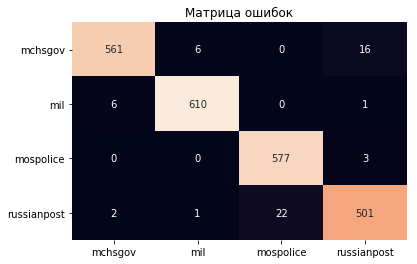

In [51]:
# Матрица ошибок
import matplotlib.pyplot as plt
import seaborn as sns

labels = clf.classes_
sns.heatmap(data=confusion_matrix(y_test, predictions), annot=True, fmt="d", cbar=False, xticklabels=labels, yticklabels=labels)
plt.title("Матрица ошибок")
plt.show()

## Задание 4 [2 балла]. Снижение размерности
Добавьте в ваш ```sklearn.pipeline```  методы снижения размерности:  PCA / LSI / LSA / LDA / другое. Какие методы классификации разумно использовать после снижения размерности? Как изменились результаты классификации после добавления нового шага?

In [52]:
from sklearn.decomposition import TruncatedSVD

clf = Pipeline([
    ('vect', CountVectorizer(ngram_range=(1,1))),
    ('tfidf', TfidfTransformer()),
    ('reduce', TruncatedSVD(n_components=30)),
    ('clf', SGDClassifier())
])

%time
clf.fit(X_train, y_train)

Wall time: 0 ns


C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip...='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False))])

In [53]:
predictions = clf.predict(X_test)
print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

    mchsgov       0.99      0.88      0.93       583
        mil       0.96      0.98      0.97       617
  mospolice       0.93      0.99      0.96       580
russianpost       0.92      0.94      0.93       526

avg / total       0.95      0.95      0.95      2306



## Задание 5 [2 балла]. Лемматизация
Посмотрите, как влияет лемматизация на качество классификации. Как изменится качество классификации, если вы используете ```CountVectorizer``` на словах или $n$-граммах на лемматизированных текстах?

In [54]:
lemmatized_text = [' '.join(text) for text in df['lemmas']]
X_train, X_test, y_train, y_test = train_test_split(lemmatized_text, df['source'], test_size=0.2, random_state=42)

In [55]:
clf = Pipeline([
    ('vect', CountVectorizer(ngram_range=(1,1))),
    ('tfidf', TfidfTransformer()),
    ('clf', SGDClassifier()),
])

%time
clf.fit(X_train, y_train)

Wall time: 0 ns


C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip...='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False))])

In [56]:
predictions = clf.predict(X_test)
print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

    mchsgov       0.98      0.96      0.97       583
        mil       0.99      0.99      0.99       617
  mospolice       0.96      0.99      0.98       580
russianpost       0.96      0.95      0.95       526

avg / total       0.97      0.97      0.97      2306



In [57]:
# Добавим энграммы
clf = Pipeline([
    ('vect', CountVectorizer(ngram_range=(1,4))),
    ('tfidf', TfidfTransformer()),
    ('clf', SGDClassifier()),
])

%time
clf.fit(X_train, y_train)

Wall time: 0 ns


C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 4), preprocessor=None, stop_words=None,
        strip...='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False))])

In [58]:
predictions = clf.predict(X_test)
print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

    mchsgov       0.98      0.95      0.97       583
        mil       0.98      0.99      0.98       617
  mospolice       0.96      1.00      0.98       580
russianpost       0.96      0.95      0.96       526

avg / total       0.97      0.97      0.97      2306



## Задание 6 [4 балла]. Модель скрытых тем
Постройте и визуализируйте модель скрытых тем (LSI или LDA) по данной коллекции текстов. Нужно ли здесь использовать разделение на тестовую и обучающую части? Как модель скрытых тем может помочь в решении задачи классификации?

## Задание 7 [4 балла]. Continious bag of words
Для baseline решения мы использовали обычное представление текста в виде мешка слов. Попробуйте использовать другие модели представления текста – например, в виде непрерывного мешка слов, то есть, в виде набора эмбеддингов. Для того, чтобы получить вектор текста попробуйте:
* усреднить все эмбеддинги слов, входящих в этот текст
* усреднить все эмбеддинги слов, входящих в этот текст с $tf-idf$ весами
* использовать любую модель эмбеддинга документа.

Используйте любую модель эмбеддингов по вашему вкусу. 


Оцените результаты классификации по стандартным мерам качества и проведите анализ ошибок. Для этого рекомендуем визуализировать матрицу ошибок (confusion matrix). 

In [39]:
import gensim
import numpy as np

In [62]:
fast_text = gensim.models.FastText([text.split() for text in cleared_text], size=50, min_n=4, max_n=8)
w2v = gensim.models.Word2Vec([text.split() for text in cleared_text], size=50, sg=1)

In [63]:
def get_embedding(text, model, dim):
    text = text.split()
    
    # чтобы не доставать одно слово несколько раз
    # сделаем счетчик, а потом векторы домножим на частоту
    words = Counter(text)
    total = len(text)
    vectors = np.zeros((len(words), dim))
    
    for i,word in enumerate(words):
        try:
            v = model[word]
            vectors[i] = v*(words[word]/total) # просто умножаем вектор на частоту
        except (KeyError, ValueError):
            continue
    
    if vectors.any():
        vector = np.average(vectors, axis=0)
    else:
        vector = np.zeros((dim))
    
    return vector

In [64]:
dim = 50
X_text_w2v = np.zeros((len(cleared_text), dim))

for i, text in enumerate(cleared_text):
    X_text_w2v[i] = get_embedding(text, w2v, dim)

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if sys.path[0] == '':


In [65]:
X_train, X_test, y_train, y_test = train_test_split(X_text_w2v, df['source'], test_size=0.2, random_state=42)

clf = SGDClassifier()

%time
clf.fit(X_train, y_train)

Wall time: 0 ns


C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)

In [66]:
predictions = clf.predict(X_test)
print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

    mchsgov       0.87      0.89      0.88       583
        mil       0.98      0.82      0.89       617
  mospolice       0.94      0.81      0.87       580
russianpost       0.68      0.89      0.77       526

avg / total       0.87      0.85      0.86      2306



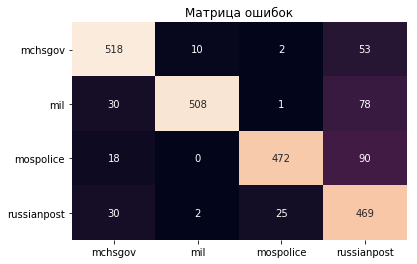

In [67]:
# Матрица ошибок
import matplotlib.pyplot as plt
import seaborn as sns

labels = clf.classes_
sns.heatmap(data=confusion_matrix(y_test, predictions), annot=True, fmt="d", cbar=False, xticklabels=labels, yticklabels=labels)
plt.title("Матрица ошибок")
plt.show()

## Задание 8 [2 балла]. fastText

Используйте ```fastText``` в режиме классификации. Оцените результаты классификации по стандартным мерам качества и проведите анализ ошибок. Для этого рекомендуем визуализировать матрицу ошибок (confusion matrix). 

In [68]:
dim = 50
X_text_fast_text = np.zeros((len(cleared_text), dim))

for i, text in enumerate(cleared_text):
    X_text_fast_text[i] = get_embedding(text, fast_text, dim)

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if sys.path[0] == '':


In [69]:
X_train, X_test, y_train, y_test = train_test_split(X_text_fast_text, df['source'], test_size=0.2, random_state=42)

clf = SGDClassifier()

%time
clf.fit(X_train, y_train)

Wall time: 0 ns


C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)

In [70]:
predictions = clf.predict(X_test)
print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

    mchsgov       0.95      0.81      0.88       583
        mil       0.96      0.73      0.83       617
  mospolice       0.94      0.87      0.90       580
russianpost       0.62      0.94      0.75       526

avg / total       0.87      0.83      0.84      2306



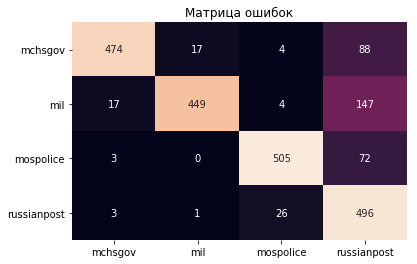

In [71]:
# Матрица ошибок
import matplotlib.pyplot as plt
import seaborn as sns

labels = clf.classes_
sns.heatmap(data=confusion_matrix(y_test, predictions), annot=True, fmt="d", cbar=False, xticklabels=labels, yticklabels=labels)
plt.title("Матрица ошибок")
plt.show()

## Конец
Подведите итоги и проведите сравнение всех использованных методов. Какой из них показался вам лучше и почему?

**NB!** Задание обязательное вне зависимости от того, сколько из предыдущих пунктов вы выполнили, и дополнительных баллов не дает. 

# Правила сдачи 

1. Домашняя работа должна быть выполнена в ipynb-тетрадке под названием `ML_HW1.ipynb`.
2. Тетрадку можно загрузить либо на GitHub (и в таком случае лучше создать для домашек по курсу отдельный репозиторий), либо в Colab.
3. Ссылку на домашку нужно оставить [вот в этом опросе](https://goo.gl/forms/JpWWwKEZRkfy8OS02). 
4. Задание выполняется в группах 1-3 человека.
5. Все вычисления должны быть снабжены пояснениями!
6. Дедлайн – 4 марта в 23.59.

**NB!** Если вы даете ссылку на Colab, то обязательно делайте это через "Share", а не просто копируйте ее из адресной строки. 